## Crypto Market Analysis

#### In this notebook we would explore various types of crytocurrencies and their trends.

In [3]:
# Import the necessary libraries
# preprocessing libraries
import pandas as pd
import numpy as np

## visualization libraries
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## modelling libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

print("all libraries imported")

all libraries imported


### Loading the data set 

In [4]:
# reading the dataset
data = pd.read_csv("crypto_market_dataset.csv")
data.head(10)



,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.180070e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.089890e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.254760e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.289470e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.248470e+09,0.8767,15.74


In [6]:
# Info about data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785024 entries, 0 to 785023
Data columns (total 13 columns):
slug           785024 non-null object
symbol         785024 non-null object
name           785024 non-null object
date           785024 non-null object
ranknow        785024 non-null int64
open           785024 non-null float64
high           785024 non-null float64
low            785024 non-null float64
close          785024 non-null float64
volume         785024 non-null float64
market         785024 non-null float64
close_ratio    785024 non-null float64
spread         785024 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 77.9+ MB


### Data Normalization(Pre processing)

In [5]:
# convert the datatype of date to datetime from object
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785024 entries, 0 to 785023
Data columns (total 13 columns):
slug           785024 non-null object
symbol         785024 non-null object
name           785024 non-null object
date           785024 non-null datetime64[ns]
ranknow        785024 non-null int64
open           785024 non-null float64
high           785024 non-null float64
low            785024 non-null float64
close          785024 non-null float64
volume         785024 non-null float64
market         785024 non-null float64
close_ratio    785024 non-null float64
spread         785024 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 77.9+ MB


In [6]:
# To normalize the market cap and volume values
data['market in billions'] = data['market'] / 1000000000
data['volume in millions'] = data['volume'] / 1000000000
data['volume in billons'] = data['volume']
data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market in billions,volume in millions,volume in billons
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09,0.5438,3.88,1.50052,0.000000,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09,0.7813,13.49,1.49116,0.000000,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09,0.3843,12.88,1.59778,0.000000,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.542820e+09,0.2882,32.17,1.54282,0.000000,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.292190e+09,0.3881,33.32,1.29219,0.000000,0.0
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0.0,1.180070e+09,0.6424,29.03,1.18007,0.000000,0.0
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0.0,1.089890e+09,0.8889,22.50,1.08989,0.000000,0.0
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0.0,1.254760e+09,0.7521,11.66,1.25476,0.000000,0.0
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0.0,1.289470e+09,0.3141,18.02,1.28947,0.000000,0.0
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0.0,1.248470e+09,0.8767,15.74,1.24847,0.000000,0.0


### Bitcoin Trend Analysis
#### . To create a new dataframe for data regarding Bitcoin.
#### . Make use of the trend analysis plot(tsplot) to study its behaviour

In [7]:
data_bitcoin = data[data.name == 'Bitcoin']
data_bitcoin.head(10)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market in billions,volume in millions,volume in billons
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,1.50052,0.0,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,1.49116,0.0,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,1.59778,0.0,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,1.54282,0.0,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,1.29219,0.0,0.0
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.180070e+09,0.6424,29.03,1.18007,0.0,0.0
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.089890e+09,0.8889,22.50,1.08989,0.0,0.0
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.254760e+09,0.7521,11.66,1.25476,0.0,0.0
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.289470e+09,0.3141,18.02,1.28947,0.0,0.0
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.248470e+09,0.8767,15.74,1.24847,0.0,0.0


C:\Users\RaviT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RaviT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RaviT\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(m

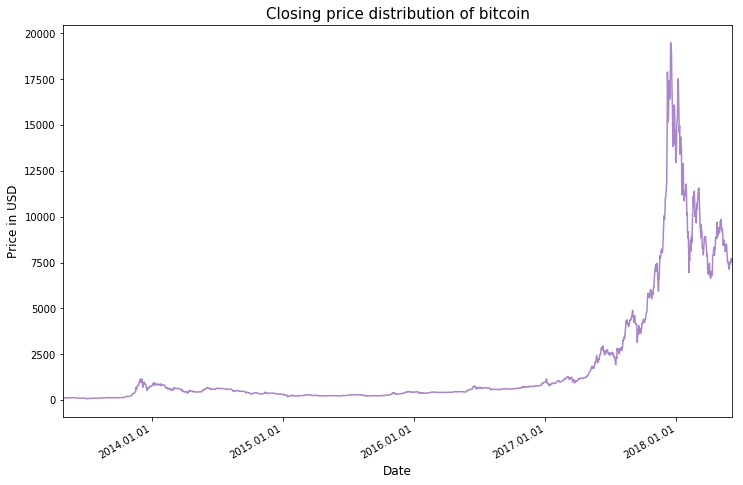

In [8]:
# PLotting the Bitcoin closing prices distribution
data_bitcoin['date'] = pd.to_datetime(data_bitcoin['date'])
data_bitcoin['Date_mpl'] = data_bitcoin['date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(data_bitcoin.close.values, time=data_bitcoin.Date_mpl.values, alpha=0.8, color=color[4], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

. From the above plot we could easily see that there a sudden increase in Bitcoin value during the early 2018, because of the  large institutional investors, who hedged those funds. As a result big investors were waiting for the right time to step in.

### Data Exploration
#### To figure out top 10 crypto currencies in the world market

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785024 entries, 0 to 785023
Data columns (total 16 columns):
slug                  785024 non-null object
symbol                785024 non-null object
name                  785024 non-null object
date                  785024 non-null object
ranknow               785024 non-null int64
open                  785024 non-null float64
high                  785024 non-null float64
low                   785024 non-null float64
close                 785024 non-null float64
volume                785024 non-null float64
market                785024 non-null float64
close_ratio           785024 non-null float64
spread                785024 non-null float64
market in billions    785024 non-null float64
volume in millions    785024 non-null float64
volume in billons     785024 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 95.8+ MB


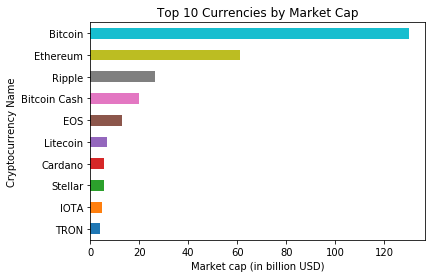

In [7]:
ax = data.groupby(['name'])['market in billions'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
ax.set_ylabel("Cryptocurrency Name");
plt.title("Top 10 Currencies by Market Cap");

. From the above bar plot we could say that Bitcoin has the topmost market within this following years of analysis.

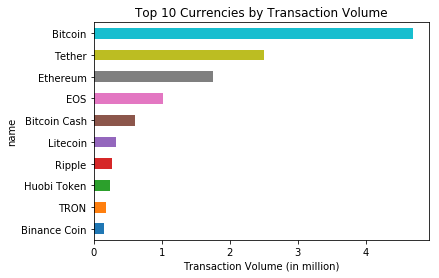

In [8]:
ax = data.groupby(['name'])['volume in millions'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [9]:
top_5_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = data[data['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market in billions,volume in millions,volume in billons
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,1.50052,0.0,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,1.49116,0.0,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,1.59778,0.0,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,1.54282,0.0,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,1.29219,0.0,0.0


### Trend Analysis based on closing values,market value and volume

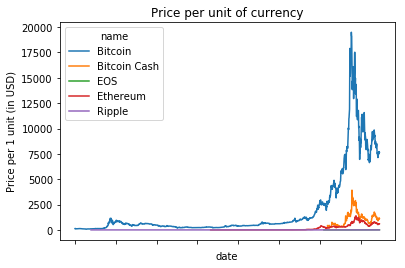

In [11]:
ax = data_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

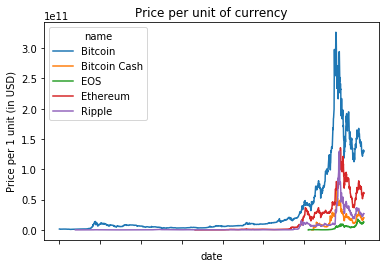

In [15]:
ax = data_top_5_currencies.groupby(['date', 'name'])['market'].mean().unstack().plot();
ax.set_ylabel("Market Cap");
plt.title("Market Cap for different currencies");

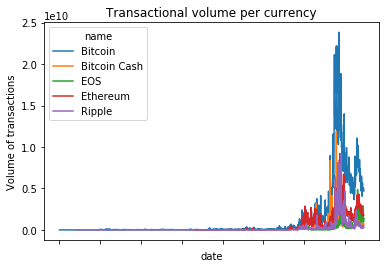

In [17]:
ax = data_top_5_currencies.groupby(['date', 'name'])['volume'].mean().unstack().plot();
ax.set_ylabel("Volume of transactions");
plt.title("Transactional volume per currency");

### Predictive Modelling

#### Future Price Prediction:

Now that we have explored the dataset, one possible next step could be to predict the future price of the currency. We could use the Propher library here to do the predictions.

In [11]:
# To predict the future price of bitcoin crypto currency using Prophet library

from fbprophet import Prophet
#data_bitcoin[["date","close"]].head(10)
data_bitcoin_analysis = data_bitcoin[["date","close"]]
#data_bitcoin_analysis.head(5)

data_bitcoin_analysis.columns = ["ds", "y"]
# to forecast 90 days in future
m = Prophet()
m.fit(data_bitcoin_analysis);
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\RaviT\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
1951,2018-08-31,13539.559071,11896.791502,15115.782637
1952,2018-09-01,13557.861900,11974.907978,15212.112400
1953,2018-09-02,13553.206302,12039.965007,15067.834219
1954,2018-09-03,13559.030017,11980.665934,15327.940750
1955,2018-09-04,13559.548556,12160.638566,15256.055647


### Terms in forecast matrix
ds -> denotes the future dates

yhat -> predicted value of bitcoin price on that specific day

yhat_lower, yhat_upper -> confidence intervals

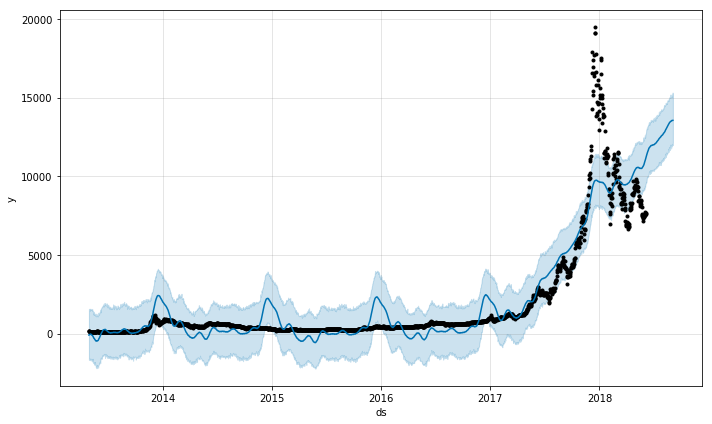

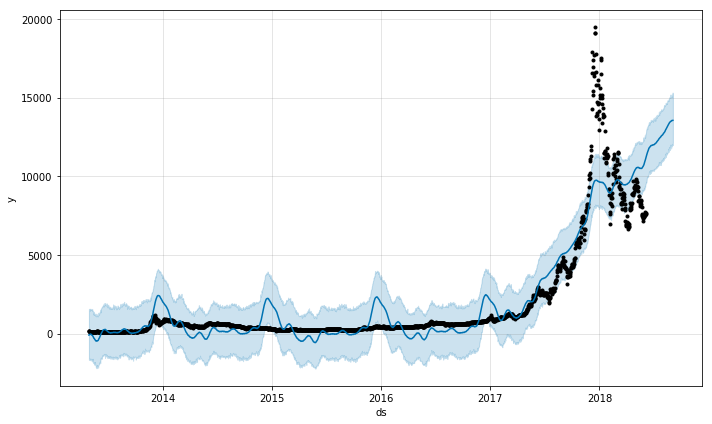

In [12]:
m.plot(forecast)


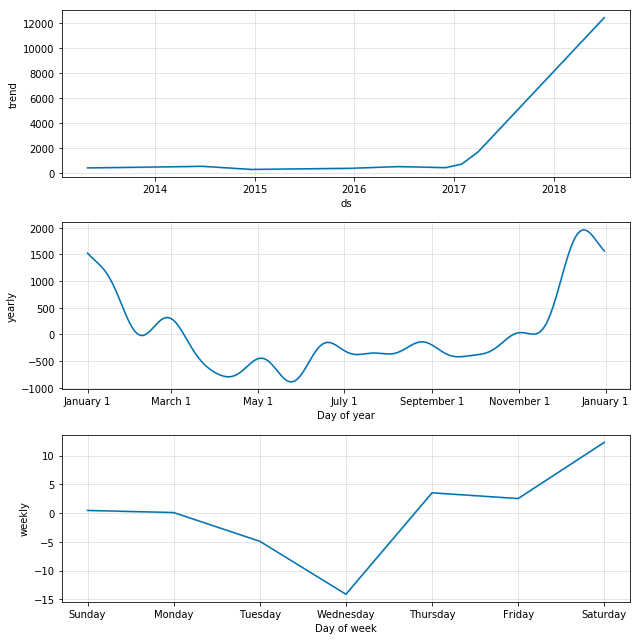

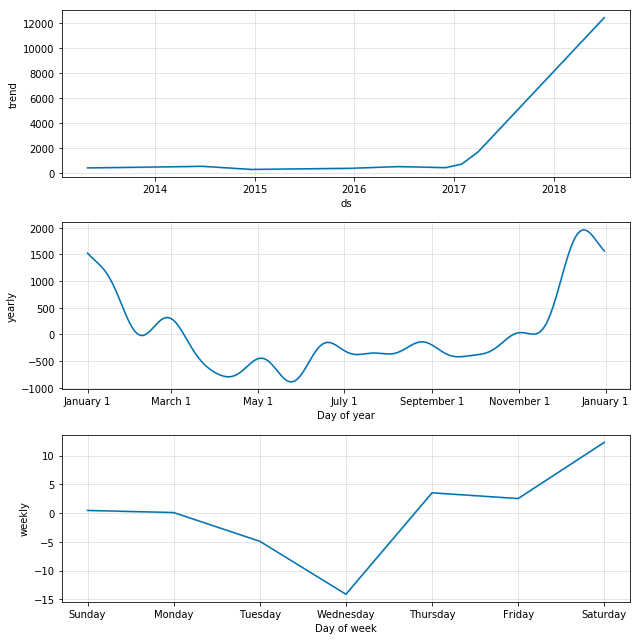

In [8]:
# Plot individulal components of forecast: trend, weekly/yearly seasonality
m.plot_components(forecast)